In [37]:
from pyrocko import util, model, io, trace, moment_tensor, gmtpy,orthodrome
from pyrocko import orthodrome as od
from pyrocko.client import catalog
from pyrocko.automap import Map
import pyrocko.moment_tensor as pmt
from pyrocko.plot import mpl_color
from pyrocko.guts import load
# from seiscloud import plot as scp
# from seiscloud import cluster as scc
import numpy as np
import os
# import shutil
import matplotlib.pyplot as plt
import pygmt
import grond

In [ ]:
workdir='../'
reportdir=os.path.join(workdir,'report')                                #main report dir

catdir=os.path.join(workdir,'CAT')
catname=os.path.join(catdir,'catalogue_flegrei_VLP_gilberto.pf')
refevents=model.load_events(catname)

mttargets = [ev for ev in refevents]
badmtsols = ['']
print('All events in catalogue:', len(mttargets))
goodmttargets = [ev for ev in mttargets if ev.name not in badmtsols]
print('Good events in catalogue:', len(goodmttargets))
grondevs = []

event_name=[]

freq=[]
freq_mean=[]
freq_std=[]

duration=[]
duration_mean=[]
duration_std=[]

lat=[]
lon=[]
for vrs in ['cmt_LP_oscill_']:
    for ev in goodmttargets:
        targetdir = os.path.join(reportdir, ev.name, vrs + ev.name)
        #if not os.path.isdir(targetdir):
            #print('missing report dir "', vrs, '" for event:',ev.name)
        if os.path.isdir(targetdir):
            fname = os.path.join(targetdir, 'stats.yaml')     # take BEST results
            VLP_stats=load(filename=fname)
            tmp_name=VLP_stats.problem.name[22:]
            event_name.append(f'{tmp_name[:4]}-{tmp_name[5:7]}-{tmp_name[8:10]}  {tmp_name[11:13]}:{tmp_name[14:16]}:{tmp_name[17:19]}')

            for stat in VLP_stats.parameter_stats_list:
                if stat.name=='duration':
                    duration.append(stat.best)
                    duration_mean.append(stat.mean)
                    duration_std.append(stat.std)
                if stat.name=='frequency':
                    freq.append(stat.best)
                    freq_mean.append(stat.mean)
                    freq_std.append(stat.std)

mean_f=np.mean(freq)
std_f=np.std(freq)
print(f'\nVLP frequency: {mean_f:1.4} +- {std_f:1.2}')

mean_d=np.mean(duration)
std_d=np.std(duration)
print(f'VLP duration: {mean_d:2.4} +- {std_d:2.4}')

All events in catalogue: 12
Good events in catalogue: 12

VLP frequency: 0.1143 +- 0.0016
VLP duration: 25.73 +- 4.842


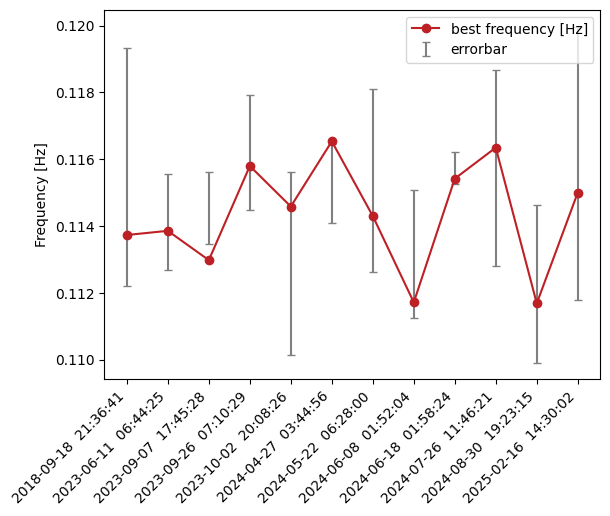

In [43]:
plt.errorbar(event_name,freq_mean,freq_std,capsize=3,fmt='None',ecolor = "gray",label='errorbar')
plt.plot(event_name,freq,'o-',color='#BD2025',label='best frequency [Hz]')
plt.ylabel('Frequency [Hz]')
plt.xticks(rotation=45, ha='right')
plt.legend(loc=1)
plt.savefig('/Users/giaco/UNI/PhD_CODE/GIT/CAMPI_FLEGREI_moment_tensor/PLOTS/PAPER/SF8/resonant_frequency_trend.pdf')
